<a href="https://colab.research.google.com/github/CamdenBaucom/TRUTH-Capstone-Project/blob/main/TRUTHmodel_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project has been to revisualize the way that we interact with history. Utilizing neural networks, and more specifically Generative Adversarial Networks, we can create new photos from events that happened more than one hundred years ago. These new images can't show new information, but they can show a prevailing sentiment. This particular project is centered on the Tulsa Race Massacre, the deadliest event of racial terrorism in American history. This project in no way aims to trivialize or minimize the horrors of that event, but rather to get people to interact with the history in a new way. This Google Colab document shows all of the commented code and 16 generated images from one execution of the code. A selected sample of generated images from nine different executions is linked [here](https://docs.google.com/drawings/d/1C6tJaB6AXQHEs2HY2A62qHAJXgUtQbNQFWDr3GH1fn8/edit?usp=sharing). A little ways down the document you'll see ten images that look fairly similar. These are nine variations of an original image (the one in the bottom left corner). This original is one of the fewer than 300 total images I was able to find anywhere on the internet from the Tulsa Race Massacre. At the bottom of the document you'll find the 16 images completely generated by the neural network from this execution.

Dataset images are not mine and may be copyrighted by the collections and websites listed below. Usage is intended under Fair Use for educational purposes.

[Tulsa Historical Society and Museum Digital Collection](https://tulsahistory.pastperfectonline.com/advancedsearch?utf8=%E2%9C%93&advanceSearchActivated=true&firstTimeSearch=true&search_include_objects=true&search_include_library=true&search_include_photos=true&search_include_archives=true&search_include_creators=true&search_include_people=true&search_include_containers=true&searchcat_1=&searchcat_2=&searchcat_3=&searchcat_4=&searchcat_5=&searchcat_6=&searchcat_7=&searchcat_8=&searchcat_9=&searchcat_10=&searchcat_11=&searchcat_12=&searchcat_13=&searchcat_14=%22Tulsa+Race+Massacre%22&searchcat_15=&searchButton=Search)

[Library of Congress Digital Collection](https://www.loc.gov/photos/?q=race+massacre,+Tulsa,+Okla)

[Oklahome State University Digital Collections](https://dc.library.okstate.edu/digital/collection/TulsaRR/search/searchterm/ruined%20buildings/field/subjec/mode/exact/conn/and/order/title/ad/asc)

[Digital Colletion developed by I. Marc Carlson](https://tulsaraceriot.omeka.net/items/browse?page=6)

[The Gateway to Oklahoma History Digital Collection from the Oklahoma Historical Society](https://gateway.okhistory.org/search/?q=Tulsa+Race+massacre&t=fulltext&sort=&fq=dc_type%3Aimage_photo)

[Smithsonian Digital Collection from the National Museum of African American History and Culture](https://www.si.edu/search/collection-images?edan_q=greenwood&edan_fq%5B%5D=unit_code:NMAAHC+OR+unit_code%3ANMAAHC_YT+OR+unit_code%3ANMAH+OR+unit_code%3ANMAH-AF+OR+unit_code%3ANMAHLC_YT+OR+unit_code%3ANMAH_BL+OR+unit_code%3ANMAH_YT+OR+unit_code%3AACAH&edan_fq%5B%5D=media_usage:%22CC0%22)

[Greenwood Cultural Center](https://www.greenwoodculturalcenter.org/early-greenwood)

In [ ]:
#Link the Google Drive where the original dataset is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Rename the files into 0.jpg, 1.jpg, 2.jpg, etc.
'''
import os
directory = '/content/drive/Shareddrives/TRUTH-EngineeringCapstoneProject/Dataset-Post-TRM'
i = 0

for filename in os.listdir(directory):
  istr = str(i)
  newname = istr + ".jpg"
  os.rename(os.path.join(directory, filename), os.path.join(directory, newname))
  i += 1
'''

'\nimport os\ndirectory = \'/content/drive/Shareddrives/TRUTH-EngineeringCapstoneProject/Dataset-Post-TRM\'\ni = 0\n\nfor filename in os.listdir(directory):\n  istr = str(i)\n  newname = istr + ".jpg"\n  os.rename(os.path.join(directory, filename), os.path.join(directory, newname))\n  i += 1\n'

Below is one of the original images (bottom left), put through nine different variations

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


'\nfig = plt.figure(figsize=(15, 15))\n\nfor i in range(2,299,10): #Change first range value from 0-8 to get new images\n  fig.add_subplot(((29.9 // 5)+2), 5, ((i/10)+1))\n  #plt.imshow(np.reshape(xtrain[i], (64,64)),cmap=\'gray\')\n  plt.imshow(np.reshape(model(tf.expand_dims(xtrain[i], 0)), (64,64)),cmap=\'gray\')\n  plt.axis("off")\n'

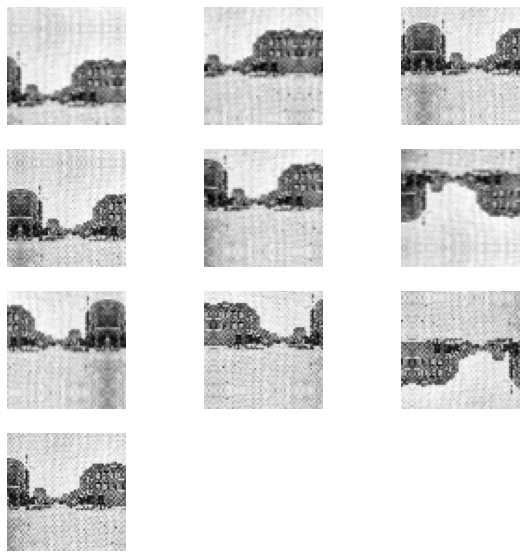

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
%pylab inline
import os
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
tf.config.run_functions_eagerly(True)
from IPython import display

directory = '/content/drive/Shareddrives/TRUTH-EngineeringCapstoneProject/Dataset-Post-TRM' #Image dataset path for Google hosted runtime

xtrainimg = []
xtrain = []

#Image Url to Dataset
for i in range(299): #loop through all images
  istr = str(i)
  imageendpath = istr + ".jpg" #image path name
  imagecontent = tf.io.read_file(os.path.join(directory, imageendpath)) #read urls
  imagegrayint = tf.io.decode_jpeg(imagecontent, channels=1) #grayscale the jpeg and decode it into a uint8 tensor 
  imagecroppedgrayint = tf.image.central_crop(imagegrayint,0.85) #cut out 15% from the border, to facilite augmentations
  imagescalegrayint = tf.image.resize(imagecroppedgrayint, (64,64)) #resize to 64x64
  #imagescalegrayfloat = tf.cast(imagescalegrayint / 255., tf.float32) #normalize the pixel values to 0-1 and change it into a float32 tensor
  imagescalegrayfloat = tf.cast(((imagescalegrayint - 127.5) / 127.5), tf.float32) #normalize the pixel values to -1 to 1 and change the tensor into a float32 tensor
  xtrainimg.append(imagescalegrayfloat) #add the tensor to an array

xtrain = tf.stack(xtrainimg, axis=0) #stack the tensors to create an array where each element is a 64x64x1 image tensor

data_augmention = tf.keras.Sequential([ #run the dataset augmentations
  layers.RandomFlip("horizontal_and_vertical"), #alow random horizontal and vertical flips
  #layers.RandomRotation(0.1), #allow random clockwise and counter-clockwise rotations of 10% in either direction
  layers.RandomTranslation(0.2,0.2) #allow random horizontal and vertical translations of 20% in all four directions
])

#Show a random image (bottom) with 9 different augmentations
fig = plt.figure(figsize=(10, 10))
image = tf.expand_dims(xtrain[random.randint(0,299)], 0)
for i in range(9):
  augmented_image = data_augmention(image)
  fig.add_subplot(4, 3, i+1)
  plt.imshow(np.reshape(augmented_image[0], (64,64)),cmap='gray')
  plt.axis("off")
fig.add_subplot(4, 3, 10)
plt.imshow(np.reshape(image, (64,64)),cmap='gray')
plt.axis("off")

#Show 30 random augmented images
'''
fig = plt.figure(figsize=(15, 15))

for i in range(2,299,10): #Change first range value from 0-8 to get new images
  fig.add_subplot(((29.9 // 5)+2), 5, ((i/10)+1))
  #plt.imshow(np.reshape(xtrain[i], (64,64)),cmap='gray')
  plt.imshow(np.reshape(model(tf.expand_dims(xtrain[i], 0)), (64,64)),cmap='gray')
  plt.axis("off")
'''

In [ ]:
xtrainaugimg = []
print(xtrain.shape) #show the size of the original dataset
numberofaugs = 34 #how many times to augment the dataset
for i in range(299): #loop through original dataset
  for a in range(numberofaugs): #augment the dataset 'numberofaugs' times
    image = tf.expand_dims(xtrain[i], 0) #get one image from the original dataset
    augmented_image = data_augmention(image) #apply the augmentations as described above
    xtrainaugimg.append(augmented_image) #add the augmentations to a new array
xtrainaug = tf.stack(xtrainaugimg, axis=0) #stack the tensors to create an array where each element is a 64x64x1 image tensor
xtrainaug = tf.reshape(xtrainaug,[(299*numberofaugs),64,64,1]) #reshape into a tensor of size numberofaugsx64x64x1
fullxtrain = tf.concat([xtrain,xtrainaug],0) #combine the augmentations with the original dataset
print(fullxtrain.shape) #show the size of the final (augmented + original) dataset

(299, 64, 64, 1)
(10465, 64, 64, 1)


DCGAN Model - Adapted from Tensorflow DCGAN Tutorial 
https://www.tensorflow.org/tutorials/generative/dcgan

Copyright 2019 The TensorFlow Authors

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

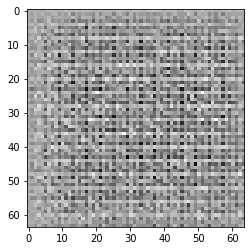

In [ ]:
BUFFER_SIZE = 60000 #since buffer size is greater than total dataset size, perfectly shuffle the dataset elements 
BATCH_SIZE = 128 #the model will go through 128 images per epoch
xtrain_dataset = tf.data.Dataset.from_tensor_slices(fullxtrain).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) #shuffle the dataset and take batch sizes of 128 images

def make_generator_model(): #assemble the generator model

    model = tf.keras.Sequential() #create a sequential model
    model.add(layers.Dense(16*16*1024, use_bias=False, input_shape=(100,))) #create a dense layer with 262144 nodes (16*16*1024) and 100 input dimensions (which is just noise)
    model.add(layers.BatchNormalization()) #normalize the data
    model.add(layers.ReLU()) #apply a ReLU activation function

    model.add(layers.Reshape((16, 16, 1024))) #reshape the next layer from 262144 nodes into a layer of 16x16 with 1024 channels
    assert model.output_shape == (None, 16, 16, 1024)  #make sure that the model layer is BATCH_SIZEx16x16x1024

    #Create an upsampled convolution layer, changing channels into length by width
    #However, since stride size is 1, the length by width doesn't change, just the number of channels (from 1024 to 512)  
    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(1, 1), padding='same', use_bias=False)) 
    assert model.output_shape == (None, 16, 16, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False)) #another upsampled convolution layer
    assert model.output_shape == (None, 16, 16, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)) #another but now with stride size of 2, so the length and widths finally double
    assert model.output_shape == (None, 32, 32, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')) #final upsampled convolution layer, but now with a tanh activation function
    assert model.output_shape == (None, 64, 64, 1)

    return model #return the model output of a generated image

generator = make_generator_model() #create the generator model

noise = tf.random.normal([1, 100]) #make the noise a random tensor of shape 1x100 (meaning one row of 100 channels each of a random value)
generated_image = generator(noise, training=False) #run the untrained model

plt.imshow(generated_image[0, :, :, 0], cmap='gray') #show the output of the untrained model

In [ ]:
def make_discriminator_model(): #assemble the discriminator model

    model = tf.keras.Sequential() #create a sequential model
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', #create a convolution layer with 64 output channels and stride size 2, which halves length and width
                                     input_shape=[64, 64, 1])) #input of a 64x64 image
    model.add(layers.LeakyReLU(alpha=0.2)) #apply a LeakyReLU activation function with a negative slope of 0.2 when x<0 instead of 0.3
    model.add(layers.Dropout(0.7)) #drop 70% of the data from this layer as a way to penalize the discriminator and stop it from crushing the generator

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same')) #create another convolution layer with 256 output channels
    model.add(layers.BatchNormalization()) #normalize the data
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.7))

    model.add(layers.Flatten()) #reshape the next layer from 16x16 with 256 channels into a flat layer with 65536 (16*16*256) nodes
    model.add(layers.Dense(1)) #create a dense layer with one output node (dicrimintaor generated/real rating)
    model.add(tf.keras.layers.Lambda(lambda x: x + [0.5])) #add 0.5 to the output in order to normalize the center point of prediction from 0 to 0.5 since we want ouputs from 0 to 1 instead of -1 to 1

    return model #return the model output of discriminator rating

In [ ]:
discriminator = make_discriminator_model() #create the disciminator model
decision = discriminator(generated_image) #put the untrainted generator's generated image into the untrained discriminator
print(decision) #ouput the discriminator's predicition of whether the image is real or generated (0 means totally conviced its fake and 1 means totally conviced its real)

tf.Tensor([[0.5003122]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True) #use binary crossentropy loss as the loss function

In [ ]:
def discriminator_loss(real_output, fake_output): #discriminator loss function
    real_loss = cross_entropy(tf.ones_like(real_output), real_output) #discriminator's loss on real images
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output) #dicriminator's loss on generated images
    total_loss = real_loss + fake_loss #discriminator's total loss
    return total_loss

In [ ]:
def generator_loss(fake_output): #generator loss funcion
#The generator's inability (loss) to trick the discriminator is equal to the discriminator's loss on incorrect labels
#For example a really good generator with low loss causes a discriminator to have high loss on generated images,
#but if we find the disciminiator's loss on inverted labels, the output will be the low loss for the generator
    return cross_entropy(tf.ones_like(fake_output), fake_output) 

In [ ]:
#Use the same Adam optimizer for both the generator and discriminator with standard learning rate,
#an initial gradient decay rate of 0.5 instead of 0.9, and a slightly smaller epsilion value from 1e-7 to 1e-8
#which slightly increases the value of weight updates in the gradient with a small offset towards lower stability
generator_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5, epsilon=1e-8)
discriminator_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5, epsilon=1e-8)

In [ ]:
#Create a call to be able to save a checkpoint of the entire model (rather than just the images)
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 500 #train on 500 individual generations
noise_dim = 100 #100 input dimensions of noise for the generator
num_examples_to_generate = 16 #generate and show 16 images as the model output

seed = tf.random.normal([num_examples_to_generate, noise_dim]) #create 100 random input dimensions for each of the 16 images that will go into the generator

In [ ]:
#Compile the function
@tf.function
def train_step(images): #train the model on this batch of images
    noise = tf.random.normal([BATCH_SIZE, noise_dim]) #make a noise tensor for all the images in the batch size (meaning 128 rows of 100 channels each of a random value)


    for i in range(1): #how many times to update the gradient per epoch, right now just once
      #Calculate the gradient (the formula for how much to update the generator and discriminator) and apply it
      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape: #create two seperate gradients, one for the generator and one for the discirminator
        generated_images = generator(noise, training=True) #create a batch of generated images

        real_output = discriminator(images, training=True) #put a batch of real images into the discriminator and record outputs
        fake_output = discriminator(generated_images, training=True) #put a batch of generated images into the discriminator and record outputs
            
        gen_loss = generator_loss(fake_output) #calculate the generator loss
        disc_loss = discriminator_loss(real_output, fake_output) #calculate the discriminator loss

      if i == 0: #how many times to update the generator's gradient per epoch, right now just once
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) #calculate the gradient for the generator from its loss
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) #apply the gradient for the generator

      if i == 0: #how many times to update the discriminator's gradient per epoch, right now just once
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables) #calculate the discriminator for the generator from its loss
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)) #apply the gradient for the discriminator

In [ ]:
#Create global arrays for loss history to be mapped later
global gen_loss_time
global disc_loss_time
gen_loss_time = []
disc_loss_time = []

#Calculate the model's current loss (which is the same formula as above, just that the loss isn't applied to anything)
def loss_test(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim]) #make a noise tensor for all the images in the batch size (meaning 128 rows of 100 channels each of a random value)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

      #Add this epoch's loss to an array to be mapped later
      global gen_loss_time
      global disc_loss_time
      gen_loss_time.append(gen_loss)
      disc_loss_time.append(disc_loss)

In [ ]:
def generate_and_save_images(model, epoch, test_input): #show the current images generated at this epoch
  predictions = model(test_input, training=False) #generator the images at this epoch, while not updating any values (training=False)

  fig = plt.figure(figsize=(10, 10)) #create a 10" x 10" plot to show the generated images


  #generate and show 16 images as the model output
  for i in range(predictions.shape[0]): #loop through the 16 generated images
      plt.subplot(4, 4, i+1) #create 16 subplots
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray') #show the generated image at its corresponding subplot
      plt.axis('off') #don't show any axises

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch)) #save the image of the generated images
  plt.show() #display the generated images

In [ ]:
def train(dataset, epochs): #train the model
  for epoch in range(epochs): #run the model for the number of epochs established above
    start = time.time() #begin a timer for every epoch

    #Train each epoch for the number of batchs which is dataset size / batch size
    for image_batch in dataset:
      train_step(image_batch)

    
    display.clear_output(wait=True) #clear the screen displaying last epoch's images only when new images are ready
    generate_and_save_images(generator, epoch + 1, seed) #show the current images generated at this epoch

    #Save the model every 10 epochs
    if (epoch + 1) % 10 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    loss_test(image_batch) #determine the current model loss
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start)) #print how long it took to complete the previous epoch

  #Show the final generated images without the information on how long it took to generate that epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

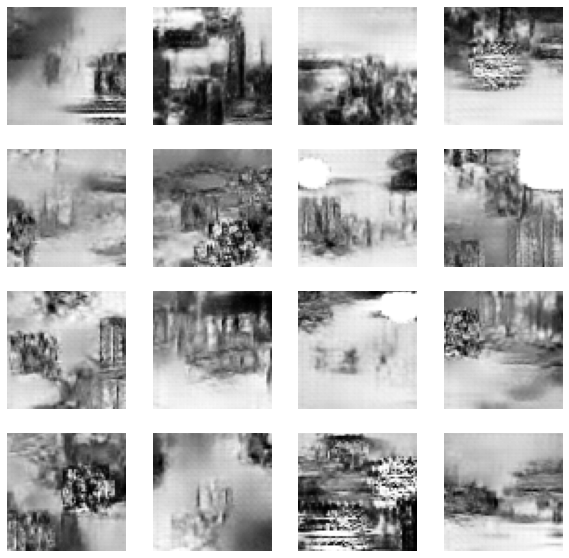

In [ ]:
train(xtrain_dataset, EPOCHS) #run the model

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir)) #restore the model code to the point where it was last saved

In [ ]:
#Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

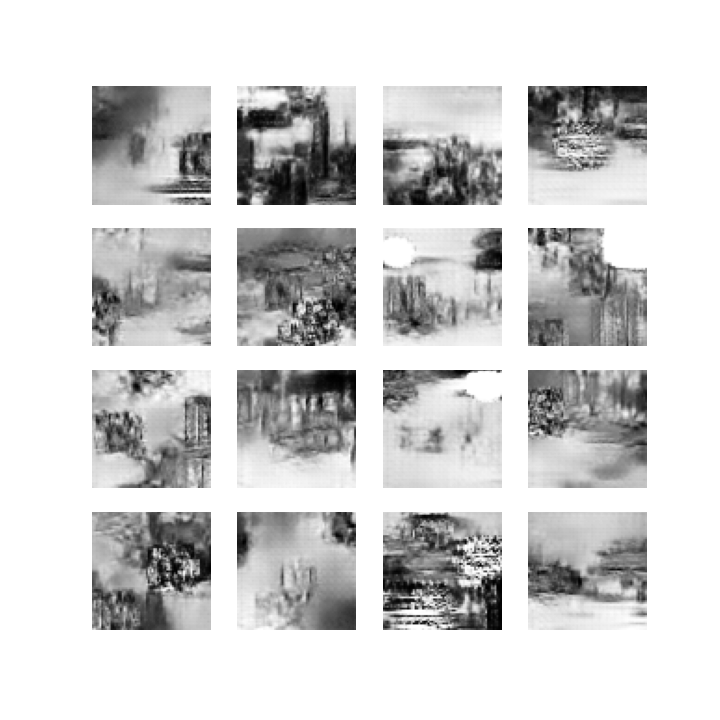

In [ ]:
display_image(EPOCHS) #display the final epoch

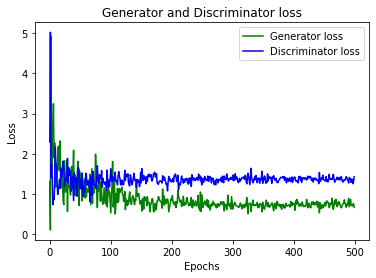

In [ ]:
#Print a map of the generator and discriminator's loss over the epochs
global gen_loss_time
global disc_loss_time
epochs = range(0, EPOCHS)
plt.plot(epochs, gen_loss_time, 'g', label='Generator loss')
plt.plot(epochs, disc_loss_time, 'b', label='Discriminator loss')
plt.title('Generator and Discriminator loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()